# Author: James Calnan (james.calnan@outlook.com)

Uncomment the below cell and run it to install the dependencies if you havent already for the packages

In [187]:
# !pip install fredapi
# !pip install pandas
# !pip install matplotlib
# !pip install numpy
# !pip install statsmodels
# !pip install tqdm
# !pip install seaborn
# !pip install requests
# !pip install urllib3
# !pip install certifi
# !pip install plotly
# !pip install scipy

In [188]:
# suppress deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# suppress pandas warnings
import pandas as pd
pd.options.mode.chained_assignment = None

from tqdm import tqdm
import requests
import numpy as np
import os


In [189]:
def clean_df(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df = df.drop(['20 YR', '30 YR', 'Extrapolation Factor',
       '8 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT', '52 WEEKS BANK DISCOUNT',
       'COUPON EQUIVALENT.1','2 Mo'],axis=1)
    return df

# Initialising variables

change the variable n to change the amount of data samples used in the plot

In [190]:
from datetime import datetime
now = datetime.now()
current_year = now.year
current_day = now.day
current_month = now.month

yield_start = '1990-01-01'
yield_end = f'{current_year}-12-31'

# Sample every n days, set n to 1 to get all data
n = 2

# use linear interpolation to get an appropriate frame rate for the amount of points on the x axis
x1, y1 = 1, 60
x2, y2 = 10, 25
frame_rate = max(int(y1 + ((y2 - y1) / (x2 - x1)) * (n - x1)), 15)

In [191]:
import os
import pandas as pd
import requests
from tqdm import tqdm

# Option 1: Use certificate verification (recommended)
# Install certifi: pip install certifi
import certifi

data_dir = 'data'
df = pd.DataFrame()

# if directory data does not exist, create it
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

int_start, int_end = int(yield_start.split('-')[0]), int(yield_end.split('-')[0])

file_name = f"yield_data_{int_start}_{int_end}"

# Check if the file already exists
if os.path.exists(f'{data_dir}/{file_name}_{current_month}_{current_day}.csv'):
    # Load the data from the file
    df = pd.read_csv(f'{data_dir}/{file_name}_{current_month}_{current_day}.csv', index_col=0, parse_dates=True)
else:
    # Initialize an empty DataFrame
    df = pd.DataFrame()

    # Fetch the data for each year and concatenate
    for year in tqdm(range(int_start, int_end + 1), desc="Fetching data", unit="year"):
        url = f"https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value={year}"
        
        response = requests.get(url, verify=certifi.where())
        
        try:
            table_list = pd.read_html(response.content)
            if table_list:
                df = pd.concat([df, clean_df(table_list[0])])
            else:
                print(f"No tables found for year {year}")
        except ValueError as e:
            print(f"Error processing year {year}: {e}")

    # Save the data to a file
    df.to_csv(f'{data_dir}/{file_name}_{current_month}_{current_day}.csv')

In [192]:
df.head()

,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,1 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,7.83,NaN,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,NaN,NaN,7.89,NaN,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,NaN,NaN,7.84,NaN,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,NaN,NaN,7.79,NaN,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,NaN,NaN,7.79,NaN,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09


In [193]:
df.tail()

,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,1 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,,
2024-08-22,NaN,NaN,5.51,5.28,5.15,4.96,4.43,3.99,3.82,3.72,3.77,3.86,4.21,4.13
2024-08-23,NaN,NaN,5.51,5.25,5.13,4.92,4.36,3.90,3.73,3.65,3.71,3.81,4.18,4.10
2024-08-26,NaN,NaN,5.49,5.24,5.13,4.91,4.38,3.91,3.74,3.66,3.72,3.82,4.19,4.11
2024-08-27,NaN,NaN,5.49,5.23,5.12,4.89,4.34,3.83,3.72,3.66,3.73,3.83,4.21,4.13
2024-08-28,NaN,NaN,5.47,5.21,5.12,4.87,4.36,3.83,3.72,3.63,3.74,3.84,4.22,4.13


In [194]:
# get rid of unneeded columns
if '4 Mo' in df.columns:
    df = df.drop('4 Mo',axis=1)
    
if '17 WEEKS BANK DISCOUNT' in df.columns:
    df = df.drop('17 WEEKS BANK DISCOUNT', axis=1)
    
if 'COUPON EQUIVALENT.2' in df.columns:
    df = df.drop('COUPON EQUIVALENT.2', axis=1)

if '1 Mo' in df.columns:
    df = df.drop('1 Mo', axis=1)

In [195]:
df.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,
1990-01-02,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09


In [196]:
# graph 3 Mo yield curve using plotly
import plotly.express as px

fig = px.line(df, x=df.index, y='3 Mo', title='3 Month Yield Curve')
fig.update_layout(
    title='3 Month Yield Curve',
    xaxis_title='Date',
    yaxis_title='Yield (%)'
)
fig.show()

In [197]:
import plotly.graph_objects as go
x = df.columns
y = df.index
z = df.to_numpy()

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Yield Curves',
                  scene = {"aspectratio": {"x": 1, "y": 1, "z": 0.4}})
fig.show()

In [198]:
df.columns

Index(['3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr',
       '20 Yr', '30 Yr'],
      dtype='object')

In [199]:
df.index

DatetimeIndex(['1990-01-02', '1990-01-03', '1990-01-04', '1990-01-05',
               '1990-01-08', '1990-01-09', '1990-01-10', '1990-01-11',
               '1990-01-12', '1990-01-16',
               ...
               '2024-08-15', '2024-08-16', '2024-08-19', '2024-08-20',
               '2024-08-21', '2024-08-22', '2024-08-23', '2024-08-26',
               '2024-08-27', '2024-08-28'],
              dtype='datetime64[ns]', name='Date', length=8673, freq=None)

In [200]:
# get the first date index
df.index[0]

Timestamp('1990-01-02 00:00:00')

In [201]:
from fredapi import Fred
# didnt need this in the end
# fed data:
fred = Fred(api_key='')
data = fred.get_series('CPIAUCSL', observation_start='2000-01-01', observation_end='2024-12-31')  # 'CPIAUCSL' is the series ID for CPI for All Urban Consumers

# Convert to DataFrame with date as index
data = data.to_frame('CPIAUCSL')

# Resample to daily frequency using forward fill to fill missing values
data = data.resample('D').ffill()

# Calculate daily inflation rate as the percentage change in CPI
data['Daily Inflation Rate'] = data['CPIAUCSL'].pct_change() * 100

# print(data.head())

In [202]:
data

,CPIAUCSL,Daily Inflation Rate
2000-01-01,169.300,NaN
2000-01-02,169.300,0.000000
2000-01-03,169.300,0.000000
2000-01-04,169.300,0.000000
2000-01-05,169.300,0.000000
...,...,...
2024-06-27,313.049,0.000000
2024-06-28,313.049,0.000000
2024-06-29,313.049,0.000000
2024-06-30,313.049,0.000000


In [203]:
# plot the federal funds rate
import plotly.express as px

fig = px.line(data, x=data.index, y='CPIAUCSL')
fig.show()

In [204]:
# Fetch the federal funds rate data

fed_funds_rate = fred.get_series('FEDFUNDS', observation_start=yield_start, observation_end=yield_end)

# Convert to DataFrame with date as index
fed_funds_rate = fed_funds_rate.to_frame('FEDFUNDS')

# Resample to daily frequency using forward fill to fill missing values
fed_funds_rate = fed_funds_rate.resample('D').ffill()

# Apply a rolling average to smooth out the curve
fed_funds_rate['FEDFUNDS_SMOOTHED'] = fed_funds_rate['FEDFUNDS'].rolling(window=30).mean()

# Plot the federal funds rate
fig = px.line(fed_funds_rate, x=fed_funds_rate.index, y='FEDFUNDS_SMOOTHED', title='Smoothed Federal Funds Rate (1980-2024)')
fig.show()

In [205]:
fed_funds_rate

,FEDFUNDS,FEDFUNDS_SMOOTHED
1990-01-01,8.23,NaN
1990-01-02,8.23,NaN
1990-01-03,8.23,NaN
1990-01-04,8.23,NaN
1990-01-05,8.23,NaN
...,...,...
2024-06-27,5.33,5.33
2024-06-28,5.33,5.33
2024-06-29,5.33,5.33
2024-06-30,5.33,5.33


In [206]:
# create a new column for actual 3mo yield
df['Actual 3 Mo'] = df['3 Mo']

In [207]:
df

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,Actual 3 Mo
Date,,,,,,,,,,,
1990-01-02,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00,7.83
1990-01-03,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04,7.89
1990-01-04,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04,7.84
1990-01-05,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06,7.79
1990-01-08,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09,7.79
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-22,5.28,4.96,4.43,3.99,3.82,3.72,3.77,3.86,4.21,4.13,5.28
2024-08-23,5.25,4.92,4.36,3.90,3.73,3.65,3.71,3.81,4.18,4.10,5.25
2024-08-26,5.24,4.91,4.38,3.91,3.74,3.66,3.72,3.82,4.19,4.11,5.24


In [208]:
# resample to twice a week
if n != 1:
    df = df.resample(f'{n}D').ffill()

df

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,Actual 3 Mo
Date,,,,,,,,,,,
1990-01-02,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00,7.83
1990-02-21,8.01,8.19,8.22,8.50,8.52,8.60,8.63,8.62,NaN,8.66,8.01
1990-04-12,8.02,8.20,8.29,8.57,8.63,8.62,8.65,8.64,NaN,8.60,8.02
1990-06-01,7.94,8.01,8.06,8.33,8.36,8.38,8.47,8.44,NaN,8.43,7.94
1990-07-21,7.79,7.84,7.84,8.08,8.18,8.28,8.43,8.48,NaN,8.54,7.79
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-03,5.43,5.22,4.81,4.36,4.14,3.99,4.02,4.03,4.33,4.22,5.43
2024-03-24,5.46,5.34,4.98,4.59,4.36,4.20,4.22,4.22,4.47,4.39,5.46
2024-05-13,5.45,5.43,5.16,4.85,4.66,4.50,4.49,4.48,4.72,4.63,5.45


In [209]:
# df.to_csv(f'{data_dir}/yield_data.csv')

Creating video:   1%|          | 33/6329 [10:12<32:28:54, 18.57s/it]
Creating video: 257it [01:42,  2.51it/s]


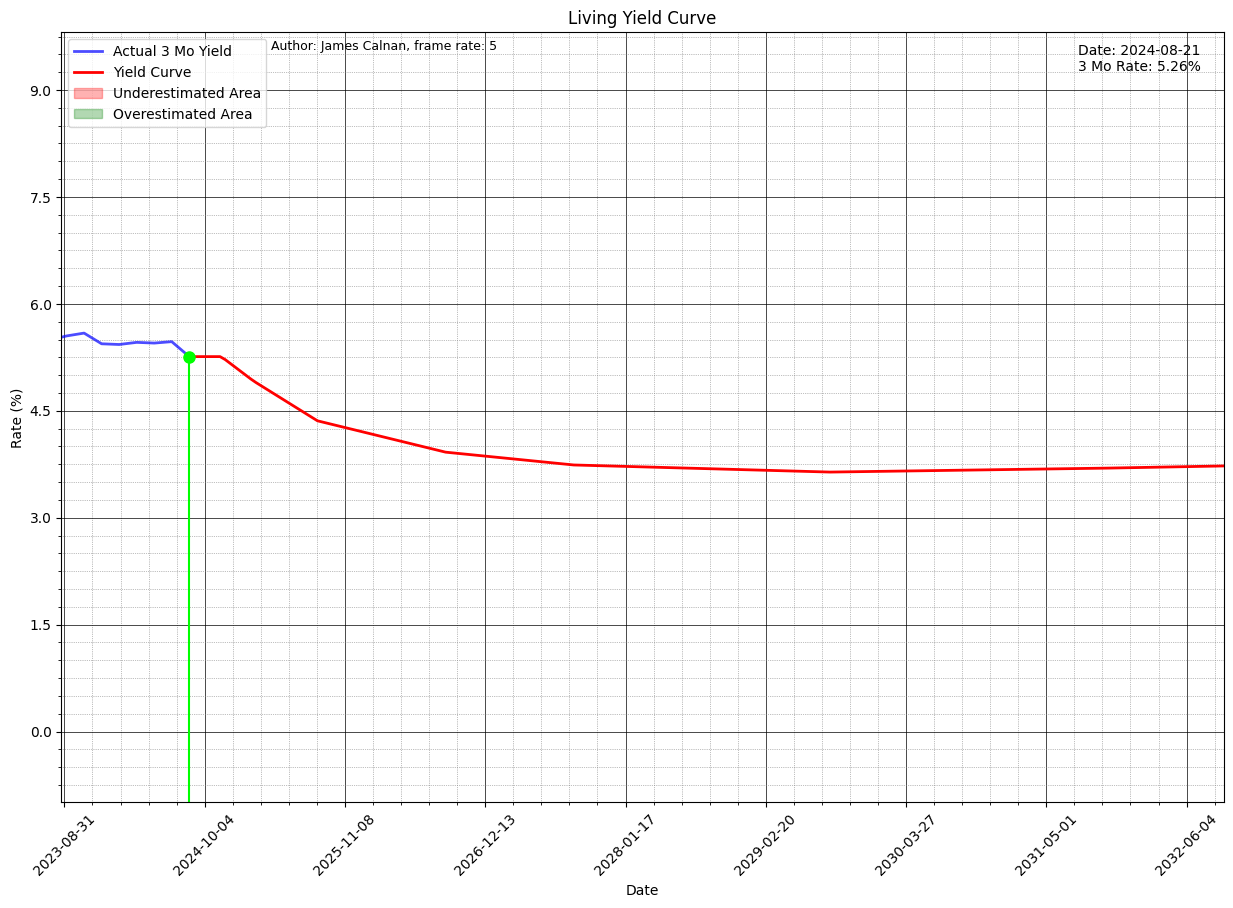

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
from scipy.interpolate import make_interp_spline
from matplotlib.dates import date2num, DateFormatter, num2date
from matplotlib.patches import Patch
from tqdm import tqdm

rate_columns = ['Actual 3 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr']
for col in rate_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

def smooth_curve(x, y):
    # Filter out NaN and inf values
    valid_indices = ~np.isnan(y) & ~np.isinf(y)
    x = x[valid_indices]
    y = y[valid_indices]
    
    if len(x) < 2:  # Not enough points to interpolate
        return np.full_like(smooth_maturities, np.nan)
    
    try:
        spl = make_interp_spline(x, y, k=1)  # Adjust degree based on number of points
        return spl(smooth_maturities)
    except ValueError:  # If interpolation fails, return NaNs
        return np.full_like(smooth_maturities, np.nan)

# Prepare the data
maturities = np.array([0, 1/4, 1/2, 1, 2, 3, 5, 7, 10, 20, 30])
smooth_maturities = np.linspace(0, 30, 750)

# Convert dates to numbers for plotting
df['date_num'] = date2num(df.index)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Initialise the plots
interest_rate_line, = ax.plot([], [], 'b-', alpha=0.7, linewidth=2, label='Actual 3 Mo Yield')
yield_curve, = ax.plot([], [], 'r-', lw=2, label='Yield Curve')
current_rate_dot, = ax.plot([], [], 'o', color='lime', markersize=8)  # Changed to lime
text = ax.text(0.98, 0.95, '', transform=ax.transAxes, ha='right')

name_text = ax.text(0.18, .99, f'Author: James Calnan, frame rate: {frame_rate}', transform=ax.transAxes, ha='left', va='top', fontsize=9)

# Initialise the vertical line
vertical_line, = ax.plot([], [], 'lime', linestyle='-')  # Changed to bright green

# Initialise global variables for fill_above and fill_below
global fill_above, fill_below
fill_above = ax.fill_between([], [], [], facecolor='red', alpha=0.3)
fill_below = ax.fill_between([], [], [], facecolor='green', alpha=0.3)

# Set up the axes
ax.set_xlim(df['date_num'].min(), df['date_num'].max())
y_min = min(df['Actual 3 Mo'].min(), df[rate_columns[1:]].min().min()) * 0.9 - 1
y_max = max(df['Actual 3 Mo'].max(), df[rate_columns[1:]].max().max()) * 1.1
ax.set_ylim(y_min, y_max)
ax.set_xlabel('Date')
ax.set_ylabel('Rate (%)')
ax.set_title('Living Yield Curve')
ax.legend(loc='upper left')
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# grid ticks
ax.xaxis.set_major_locator(plt.MaxNLocator(10))  
ax.xaxis.set_minor_locator(plt.MaxNLocator(50))  
ax.yaxis.set_major_locator(plt.MaxNLocator(10))  
ax.yaxis.set_minor_locator(plt.MaxNLocator(50))  
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

scale_factor = 1
history_window = 365 * scale_factor

def update(frame):
    global fill_above, fill_below
    
    current_date = df.index[frame]
    current_date_num = df.iloc[frame]['date_num']
    
    # Calculate yield curve dates
    yield_curve_dates_num = current_date_num + smooth_maturities * 365
    
    # Update x-axis limits for scrolling effect
    left_limit = current_date_num - history_window
    right_limit = yield_curve_dates_num[-1]   # End of the yield curve
    ax.set_xlim(left_limit, right_limit - 8000)

    # Update interest rate history
    visible_history = df
    interest_rate_line.set_data(visible_history['date_num'], visible_history['Actual 3 Mo'])
    
    # Get current yield curve data
    yields = df.iloc[frame][rate_columns[1:]].values
    current_rate = df.iloc[frame]['Actual 3 Mo']
    
    # Filter out NaN and inf values
    valid_indices = ~np.isnan(yields) & ~np.isinf(yields)
    valid_maturities = maturities[1:][valid_indices]
    valid_yields = yields[valid_indices]
    
    # prepare yield curve data
    all_yields = np.concatenate(([current_rate], valid_yields))
    all_maturities = np.concatenate(([0], valid_maturities))
    
    # smooth the yield curve
    try:
        smooth_yields = smooth_curve(all_maturities, all_yields)
    except ValueError:
        # If smoothing fails, use the original data points
        smooth_yields = all_yields
        yield_curve_dates_num = current_date_num + all_maturities * 365
    
    # Update yield curve plot
    yield_curve.set_data(yield_curve_dates_num, smooth_yields)
    
    # Update current rate dot
    current_rate_dot.set_data([current_date_num], [current_rate])

    # update vertical line
    vertical_line.set_data([current_date_num, current_date_num], [ax.get_ylim()[0], current_rate])
    
    # Update fill
    fill_above.remove()
    fill_below.remove()
    
    # Interpolate interest rate history to match the length of smooth_yields
    interpolated_interest_rate = np.interp(yield_curve_dates_num, visible_history['date_num'], visible_history['Actual 3 Mo'])

    # Find the index where the yield curve dates exceed the last date of the interest rate line
    fill_end_index = np.searchsorted(yield_curve_dates_num, visible_history['date_num'].iloc[-1])

    # limit the fill to the length of the visible history
    fill_above = ax.fill_between(yield_curve_dates_num[:fill_end_index], interpolated_interest_rate[:fill_end_index], smooth_yields[:fill_end_index], 
                                where=(smooth_yields[:fill_end_index] > interpolated_interest_rate[:fill_end_index]), 
                                facecolor='red', alpha=0.3, interpolate=True)
    fill_below = ax.fill_between(yield_curve_dates_num[:fill_end_index], interpolated_interest_rate[:fill_end_index], smooth_yields[:fill_end_index], 
                                where=(smooth_yields[:fill_end_index] <= interpolated_interest_rate[:fill_end_index]), 
                                facecolor='green', alpha=0.3, interpolate=True)
    
    # update text
    text.set_text(f'Date: {current_date.strftime("%Y-%m-%d")}\n3 Mo Rate: {current_rate:.2f}%')
    
    return interest_rate_line, yield_curve, current_rate_dot, vertical_line, fill_above, fill_below, text

red_patch = Patch(color='red', alpha=0.3, label='Underestimated Area')
green_patch = Patch(color='green', alpha=0.3, label='Overestimated Area')

ax.legend(handles=[interest_rate_line, yield_curve, red_patch, green_patch], loc='upper left')

pbar = tqdm(total=len(df), desc="Creating video")
def update_with_progress(frame):
    try:
        result = update(frame)
        pbar.update(1)
        return result
    except Exception as e:
        print(f"Error at frame {frame}: {str(e)}")
        pbar.update(1)
        return interest_rate_line, yield_curve, current_rate_dot, vertical_line, fill_above, fill_below, text

anim = FuncAnimation(fig, update_with_progress, frames=len(df), interval=1, blit=True)

# save the video
ffmpeg_writer = FFMpegWriter(fps=frame_rate, metadata=dict(artist='James Calnan'), bitrate=1800)

length_of_df = len(df)
anim.save(f'interest_rate_and_yield_curve_animation_{n}_sample.mkv', writer=ffmpeg_writer)

pbar.close()
